# Анализ датасета розничных продаж в Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
# Настройка отображения графиков
%matplotlib inline
sns.set_theme(style="whitegrid")  
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Загрузка и первичный осмотр данных

In [4]:
df = pd.read_csv('D:\\Downloads\\sales.csv') 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [5]:
df.info()
print("\nПропущенные значения:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice ID,1000,1000,849-09-3807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,1000,3,A,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1000,3,Yangon,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,1000,2,Member,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,1000,6,Fashion accessories,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,1000.00,NaN,NaN,NaN,55.67,26.49,10.08,32.88,55.23,77.94,99.96
Quantity,1000.00,NaN,NaN,NaN,5.51,2.92,1.00,3.00,5.00,8.00,10.00
Tax 5%,1000.00,NaN,NaN,NaN,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Total,1000.00,NaN,NaN,NaN,322.97,245.89,10.68,124.42,253.85,471.35,1042.65


# 2. Предварительная обработка данных

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0-понедельник, 6-воскресенье
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# 3. Анализ продаж

## 3.1. Общие показатели

In [10]:
metrics = {
    'Total Sales': df['Total'].sum(),
    'Number of Invoices': df['Invoice ID'].nunique(),
    'Average Rating': df['Rating'].mean(),
    'Average Transaction Value': df['Total'].mean(),
    'Total Quantity Sold': df['Quantity'].sum()
}

pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

,Value
Total Sales,322966.75
Number of Invoices,1000.00
Average Rating,6.97
Average Transaction Value,322.97
Total Quantity Sold,5510.00


## 3.2. Динамика продаж по времени

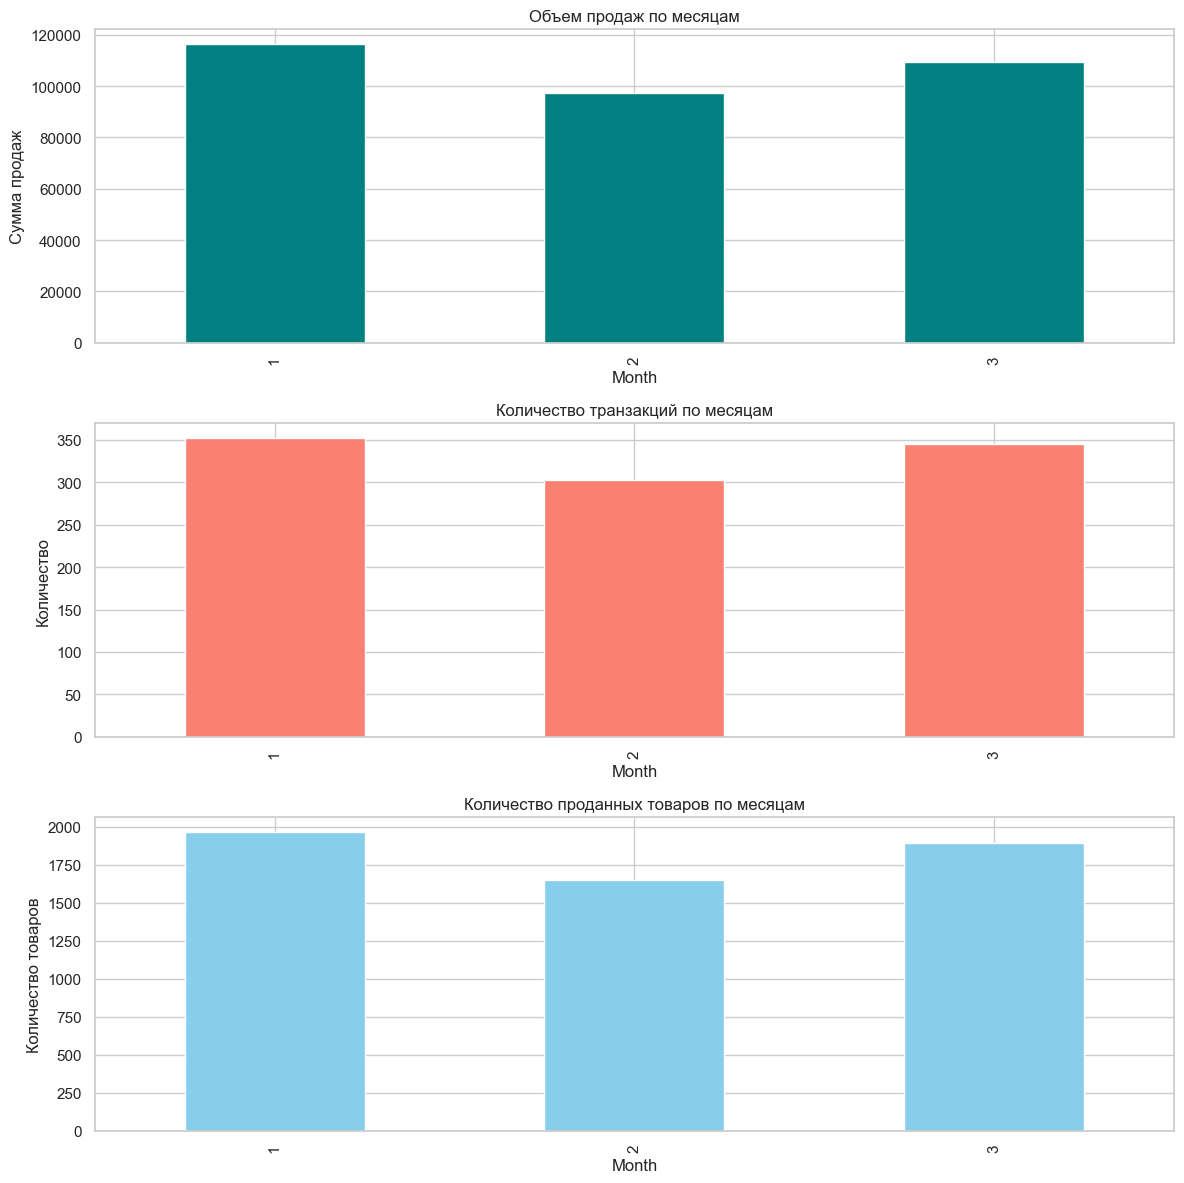

In [11]:
monthly_sales = df.groupby('Month').agg({
    'Total': 'sum',
    'Invoice ID': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'Invoice ID': 'Transactions'})

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

monthly_sales['Total'].plot(kind='bar', ax=axes[0], title='Объем продаж по месяцам', color='teal')
axes[0].set_ylabel('Сумма продаж')

monthly_sales['Transactions'].plot(kind='bar', ax=axes[1], title='Количество транзакций по месяцам', color='salmon')
axes[1].set_ylabel('Количество')

monthly_sales['Quantity'].plot(kind='bar', ax=axes[2], title='Количество проданных товаров по месяцам', color='skyblue')
axes[2].set_ylabel('Количество товаров')

plt.tight_layout()
plt.show()

## 3.3. Анализ по филиалам

In [12]:
branch_analysis = df.groupby(['Branch', 'City']).agg({
    'Total': ['sum', 'mean'],
    'Invoice ID': 'nunique',
    'Rating': 'mean'
}).round(2)

branch_analysis.columns = ['Total Sales', 'Avg Transaction', 'Transactions', 'Avg Rating']
branch_analysis

C:\Users\v_dav\AppData\Local\Temp\ipykernel_21064\2575008684.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_analysis = df.groupby(['Branch', 'City']).agg({


Total Sales  Avg Transaction  Transactions  Avg Rating
Branch City                                                             
A      Mandalay          0.00              NaN             0         NaN
       Naypyitaw         0.00              NaN             0         NaN
       Yangon       106200.37           312.35           340        7.03
B      Mandalay     106197.67           319.87           332        6.82
       Naypyitaw         0.00              NaN             0         NaN
       Yangon            0.00              NaN             0         NaN
C      Mandalay          0.00              NaN             0         NaN
       Naypyitaw    110568.71           337.10           328        7.07
       Yangon            0.00              NaN             0         NaN

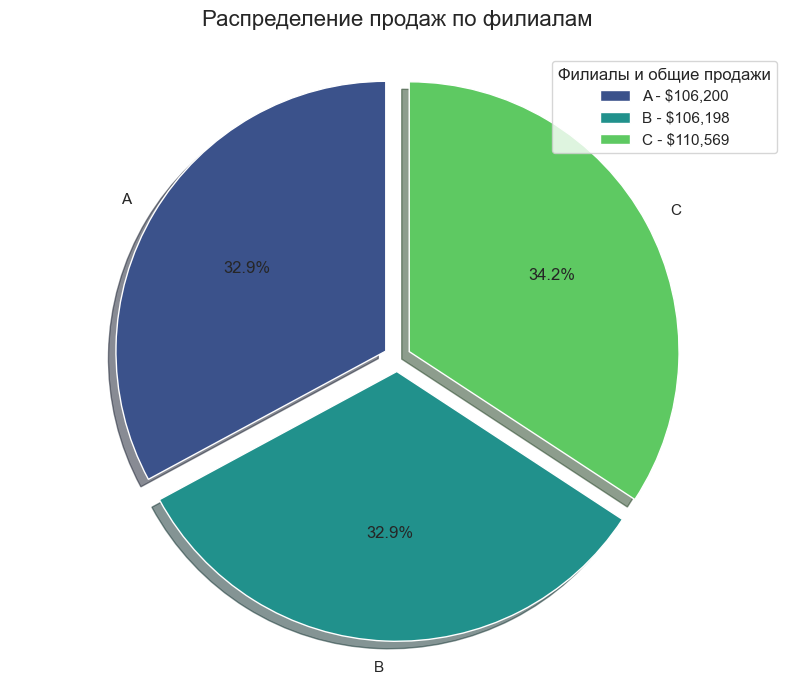

In [16]:
branch_sales = df.groupby('Branch', observed=True)['Total'].sum().reset_index()

plt.figure(figsize=(10, 8))
plt.pie(branch_sales['Total'], 
        labels=branch_sales['Branch'], 
        autopct='%1.1f%%',  
        startangle=90,
        colors=sns.color_palette('viridis', len(branch_sales)),
        explode=[0.05] * len(branch_sales),  
        shadow=True)

plt.title('Распределение продаж по филиалам', fontsize=16, pad=20)

legend_labels = [f"{branch} - ${total:,.0f}" 
                for branch, total in zip(branch_sales['Branch'], branch_sales['Total'])]
plt.legend(legend_labels, title="Филиалы и общие продажи", loc="best")

plt.axis('equal')

plt.show()

# 4. Анализ товаров

## 4.1. Продажи по категориям товаров


In [24]:
product_sales = df.groupby('Product line', observed=True)['Total'].sum().nlargest(5).reset_index()
product_sales

,Product line,Total
0,Food and beverages,56144.84
1,Sports and travel,55122.83
2,Electronic accessories,54337.53
3,Fashion accessories,54305.89
4,Home and lifestyle,53861.91


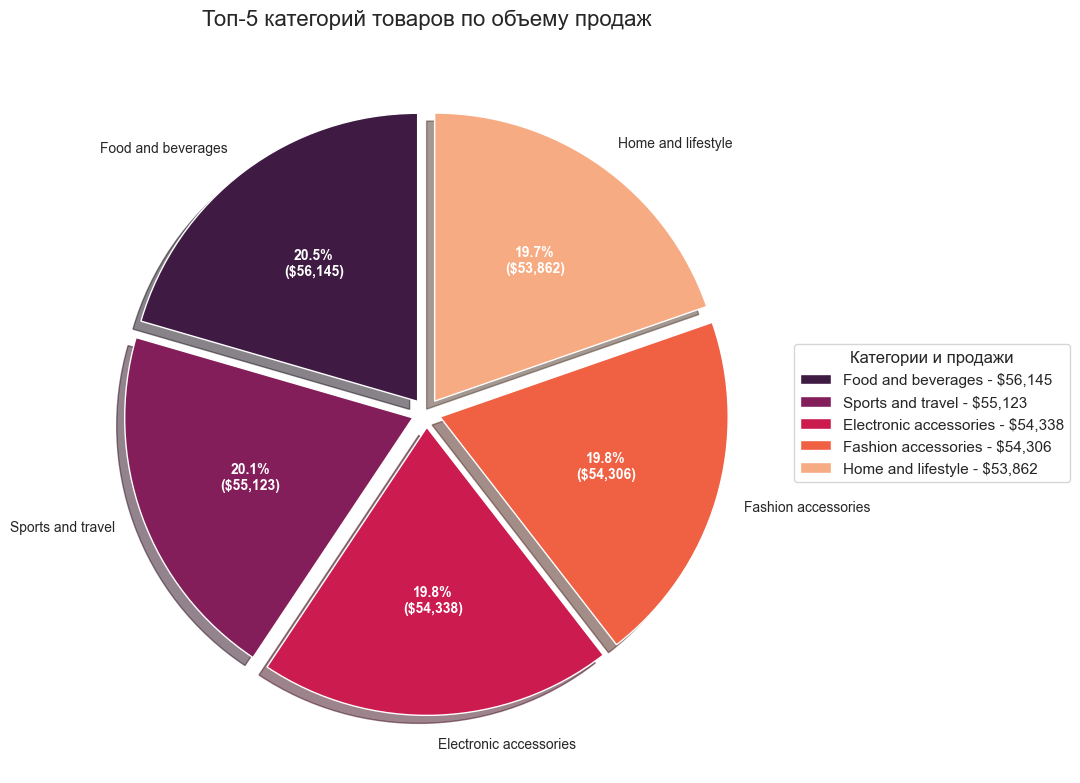

In [25]:
plt.figure(figsize=(10, 8))

patches, texts, autotexts = plt.pie(
    product_sales['Total'],
    labels=product_sales['Product line'],
    autopct=lambda p: f'{p:.1f}%\n(${p*sum(product_sales["Total"])/100:,.0f})',
    startangle=90,
    colors=sns.color_palette('rocket', len(product_sales)),
    explode=[0.05] * len(product_sales),
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Топ-5 категорий товаров по объему продаж', fontsize=16, pad=20)

legend_labels = [f"{row['Product line']} - ${row['Total']:,.0f}" 
                for _, row in product_sales.iterrows()]
plt.legend(patches, legend_labels, 
           title="Категории и продажи",
           loc="center left",
           bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## 4.2. Маржинальность категорий


In [27]:
product_margin = df.groupby('Product line', observed=False).agg({
    'Total': 'sum',
    'gross income': 'sum'
})
product_margin['Margin %'] = (product_margin['gross income'] / product_margin['Total']) * 100

product_margin.sort_values('Margin %', ascending=False)

,Total,gross income,Margin %
Product line,,,
Health and beauty,49193.74,2342.56,4.76
Electronic accessories,54337.53,2587.50,4.76
Fashion accessories,54305.89,2585.99,4.76
Food and beverages,56144.84,2673.56,4.76
Home and lifestyle,53861.91,2564.85,4.76
Sports and travel,55122.83,2624.90,4.76


# 5. Анализ покупателей

## 5.1. Распределение по типам покупателей

In [29]:
customer_analysis = df.groupby(['Customer type', 'Gender'], observed=False).agg({
    'Invoice ID': 'nunique',
    'Total': 'sum',
    'Rating': 'mean'
}).rename(columns={'Invoice ID': 'Transactions'})

customer_analysis

Transactions    Total  Rating
Customer type Gender                               
Member        Female           261 88146.94    6.94
              Male             240 76076.50    6.94
Normal        Female           240 79735.98    6.99
              Male             259 79007.32    7.02

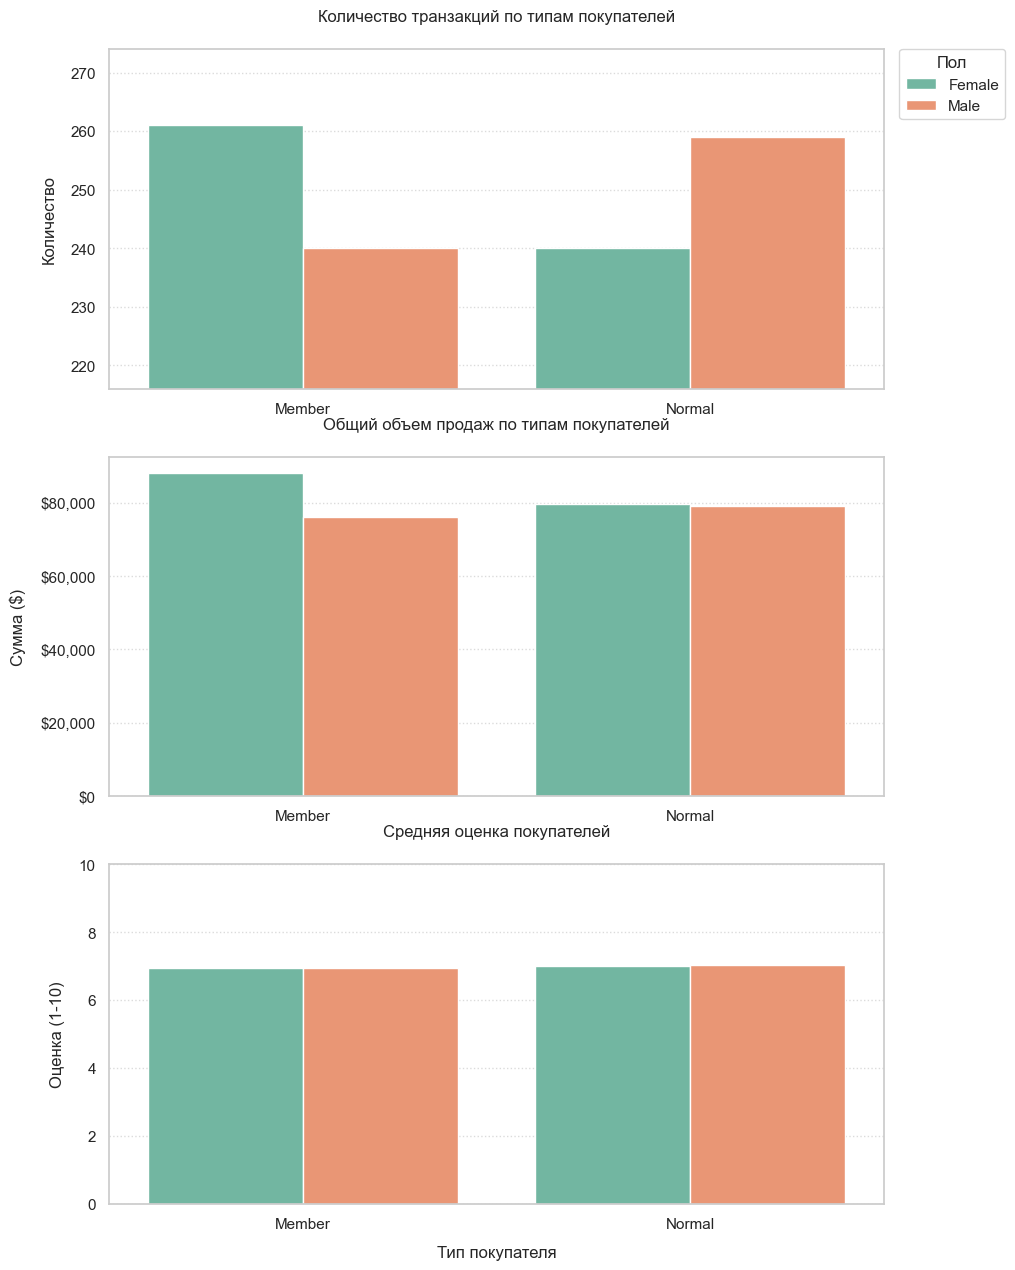

In [40]:
customer_analysis = df.groupby(['Customer type', 'Gender'], observed=True).agg({
    'Invoice ID': 'nunique',
    'Total': 'sum',
    'Rating': 'mean'
}).rename(columns={'Invoice ID': 'Transactions'}).reset_index()

plt.figure(figsize=(10, 15))

# 1. Количество транзакций
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='Customer type', y='Transactions', hue='Gender',
                 data=customer_analysis, palette='Set2', dodge=True)
plt.title('Количество транзакций по типам покупателей', pad=20)
plt.ylabel('Количество', labelpad=10)
plt.xlabel('')
ax1.get_legend().remove()
plt.grid(axis='y', linestyle=':', alpha=0.7)

min_trans = customer_analysis['Transactions'].min()
ax1.set_ylim(bottom=min_trans*0.9)

# 2. Общий объем продаж
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='Customer type', y='Total', hue='Gender',
                 data=customer_analysis, palette='Set2', dodge=True)
plt.title('Общий объем продаж по типам покупателей', pad=20)
plt.ylabel('Сумма ($)', labelpad=10)
plt.xlabel('')
ax2.get_legend().remove()
plt.grid(axis='y', linestyle=':', alpha=0.7)

ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

# 3. Средний рейтинг
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='Customer type', y='Rating', hue='Gender',
                 data=customer_analysis, palette='Set2', dodge=True)
plt.title('Средняя оценка покупателей', pad=20)
plt.ylabel('Оценка (1-10)', labelpad=10)
plt.xlabel('Тип покупателя', labelpad=10)
plt.grid(axis='y', linestyle=':', alpha=0.7)

ax3.set_ylim(0, 10)

handles, labels = ax3.get_legend_handles_labels()
plt.legend(handles, labels, title='Пол', 
           bbox_to_anchor=(1.02, 3.4), 
           loc='upper left',
           borderaxespad=0.)

#plt.tight_layout(pad=3.0)
plt.show()

## 5.2. Средний чек по типам покупателей


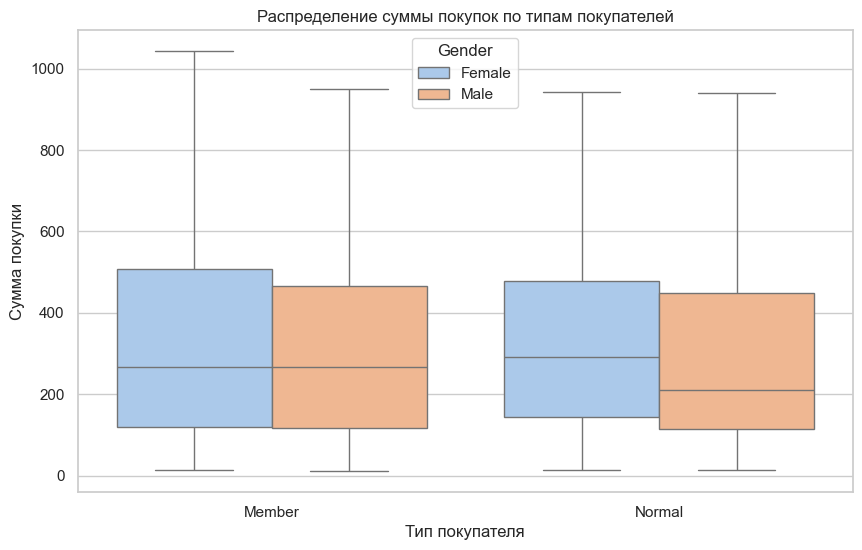

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer type', y='Total', 
            hue='Gender', data=df,
            palette='pastel', showfliers=False)
plt.title('Распределение суммы покупок по типам покупателей')
plt.ylabel('Сумма покупки')
plt.xlabel('Тип покупателя')
plt.show()

# 6. Анализ внешних факторов (из API)


## 6.1. Влияние погоды на продажи


In [47]:
import requests

In [55]:
# Конфигурация API
HOLIDAY_API_KEY = "8f2c957b-8f29-4128-b7ac-d6230dedb51b"
COUNTRY = "MM"  # Код Мьянмы
YEAR = 2024      # Берем праздники 2024 года

def fetch_holidays():
    """Получение праздников 2024 года с кэшированием"""
    try:
        try:
            holidays = pd.read_csv('holidays_2024_cache.csv')
            print("Данные о праздниках загружены из кэша")
            return holidays
        except FileNotFoundError:
            pass
        
        # Делаем запрос к API только если нет кэша
        print("Делаем запрос к HolidayAPI (2024 год)...")
        url = f"https://holidayapi.com/v1/holidays?country={COUNTRY}&year={YEAR}&key={HOLIDAY_API_KEY}"
        response = requests.get(url)
        response.raise_for_status()
        
        # Обрабатываем ответ
        holidays_data = response.json().get('holidays', [])
        holidays = pd.DataFrame(holidays_data)
        
        # Сохраняем в кэш
        holidays.to_csv('holidays_2024_cache.csv', index=False)
        print(f"Получено {len(holidays)} праздников за 2024 год")
        return holidays
    
    except Exception as e:
        print(f"Ошибка при получении данных: {e}")
        return pd.DataFrame()

def add_holiday_info(df):
    #Добавляем информацию о праздниках, используя даты 2024 года для всех годов
    holidays = fetch_holidays()
    
    if holidays.empty:
        print("Не удалось получить данные о праздниках")
        df['is_holiday'] = False
        df['holiday_name'] = None
        return df
    
    # Преобразуем даты праздников 2024 года
    holidays['date'] = pd.to_datetime(holidays['date'])
    holidays['month_day'] = holidays['date'].dt.strftime('%m-%d')  # Извлекаем месяц и день
    
    # Создаем словарь для быстрого поиска
    holiday_dict = dict(zip(holidays['month_day'], holidays['name']))
    
    # Добавляем информацию о праздниках для всех годов
    df['date'] = pd.to_datetime(df['Date'])
    df['month_day'] = df['date'].dt.strftime('%m-%d')
    
    df['is_holiday'] = df['month_day'].isin(holiday_dict)
    df['holiday_name'] = df['month_day'].map(holiday_dict)
    
    # Удаляем временные колонки
    df.drop(['date', 'month_day'], axis=1, inplace=True)
    
    return df

In [56]:
# Добавляем информацию о праздниках к данным
df = add_holiday_info(df)

# Проверяем результат
print("\nРезультат добавления праздников:")
print(f"Всего праздничных дней в данных: {df['is_holiday'].sum()}")
print("Примеры праздников в данных:")
print(df[df['is_holiday']][['Date', 'holiday_name']].drop_duplicates().sort_values('Date'))

Делаем запрос к HolidayAPI (2024 год)...
Получено 39 праздников за 2024 год

Результат добавления праздников:
Всего праздничных дней в данных: 108
Примеры праздников в данных:
          Date              holiday_name
17  2019-01-01            New Year's Day
156 2019-01-04          Independence Day
225 2019-01-11            Kayin New Year
12  2019-02-12                 Union Day
24  2019-03-02             Peasants' Day
1   2019-03-08           Maha Shivaratri
212 2019-03-20             March Equinox
108 2019-03-24  Full Moon Day of Tabaung
5   2019-03-25        Festival of Colors
56  2019-03-27          Armed Forces Day


In [60]:
# Подготовка данных
holiday_stats = df.groupby('is_holiday').agg({
    'Total': ['sum', 'mean'],
    'Invoice ID': 'nunique',
    'Quantity': 'sum',
    'Rating': 'mean'
})
holiday_stats.columns = ['Total Sum', 'Avg Transaction', 'Transactions', 'Total Quantity', 'Avg Rating']
    

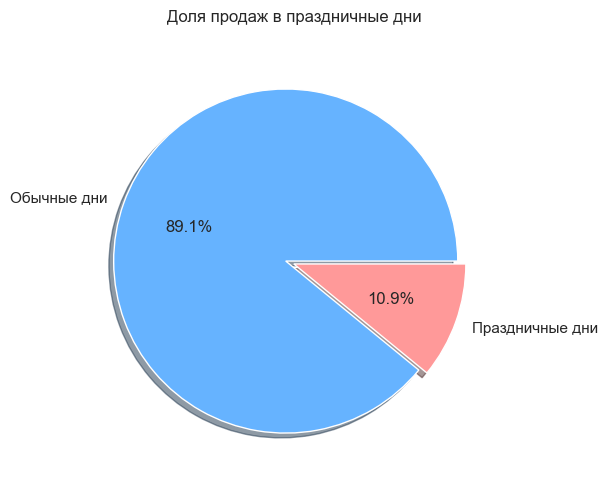

In [63]:
# Создаем фигуру с несколькими графиками
plt.figure(figsize=(16, 10))

# 1. Круговой график доли продаж
plt.subplot(2, 2, 1)
plt.pie(holiday_stats['Total Sum'], 
        labels=['Обычные дни', 'Праздничные дни'],
        autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'],
        explode=(0.05, 0),
        shadow=True)
plt.title('Доля продаж в праздничные дни', pad=20)

plt.tight_layout(pad=2)
plt.show()

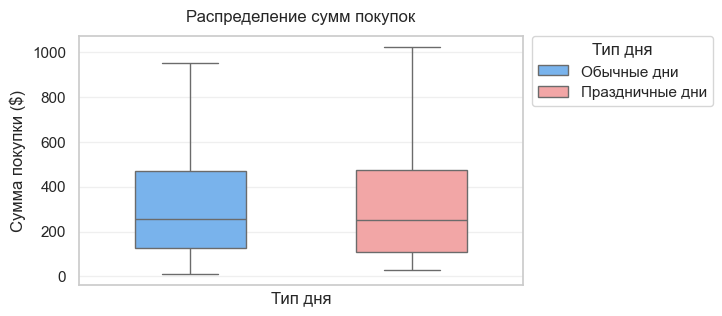

In [67]:
# 2. Распределение сумм покупок с легендой справа
plt.subplot(2, 2, 3)
box_plot = sns.boxplot(x='is_holiday', y='Total', data=df,
                      hue='is_holiday',
                      palette=['#66b3ff','#ff9999'],
                      showfliers=False,
                      width=0.5)

plt.title('Распределение сумм покупок', pad=10)
plt.xlabel('Тип дня')
plt.ylabel('Сумма покупки ($)')
plt.xticks([], [])  # Убираем подписи по оси X, так как используем легенду
plt.grid(axis='y', alpha=0.3)

# Настраиваем легенду
handles, labels = box_plot.get_legend_handles_labels()
labels = ['Обычные дни', 'Праздничные дни']  # Четкие подписи
plt.legend(handles, labels, 
           title='Тип дня',
           bbox_to_anchor=(1.02, 1),  # Выносим легенду справа от графика
           loc='upper left',
           borderaxespad=0.)

plt.tight_layout()  # Обеспечиваем правильное расположение элементов

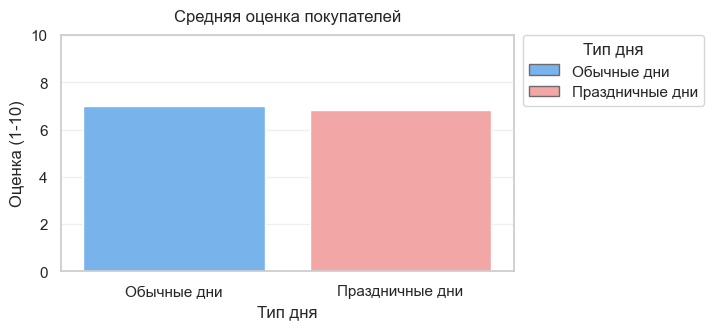

In [71]:
# 3. Средний рейтинг
plt.subplot(2, 2, 4)
sns.barplot(x=holiday_stats.index, hue=holiday_stats.index,
            y='Avg Rating', 
            data=holiday_stats.reset_index(),
            palette=['#66b3ff','#ff9999'])
plt.title('Средняя оценка покупателей', pad=10)
plt.xlabel('Тип дня')
plt.ylabel('Оценка (1-10)')
plt.xticks([0, 1], ['Обычные дни', 'Праздничные дни'])
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3)
plt.legend(handles, labels, 
           title='Тип дня',
           bbox_to_anchor=(1.02, 1),  # Выносим легенду справа от графика
           loc='upper left',
           borderaxespad=0.)

plt.tight_layout()  # Обеспечиваем правильное расположение элементов

In [88]:
# Рассчитываем количество дней каждого типа
total_days = df['Date'].nunique()
holiday_days = df[df['is_holiday']]['Date'].nunique()
normal_days = total_days - holiday_days

holiday_stats = df.groupby('is_holiday', observed=True).agg({
    'Total': 'sum',
    'Invoice ID': 'nunique',
    'Quantity': 'sum',
    'Rating': 'mean'
}).rename(columns={
    'Total': 'total_sales',
    'Invoice ID': 'transactions',
    'Quantity': 'items_sold'
})

# Рассчитываем относительные показатели на 1 день
holiday_stats['sales_per_day'] = holiday_stats['total_sales'] / [normal_days, holiday_days]
holiday_stats['transactions_per_day'] = holiday_stats['transactions'] / [normal_days, holiday_days]
holiday_stats['items_per_day'] = holiday_stats['items_sold'] / [normal_days, holiday_days]


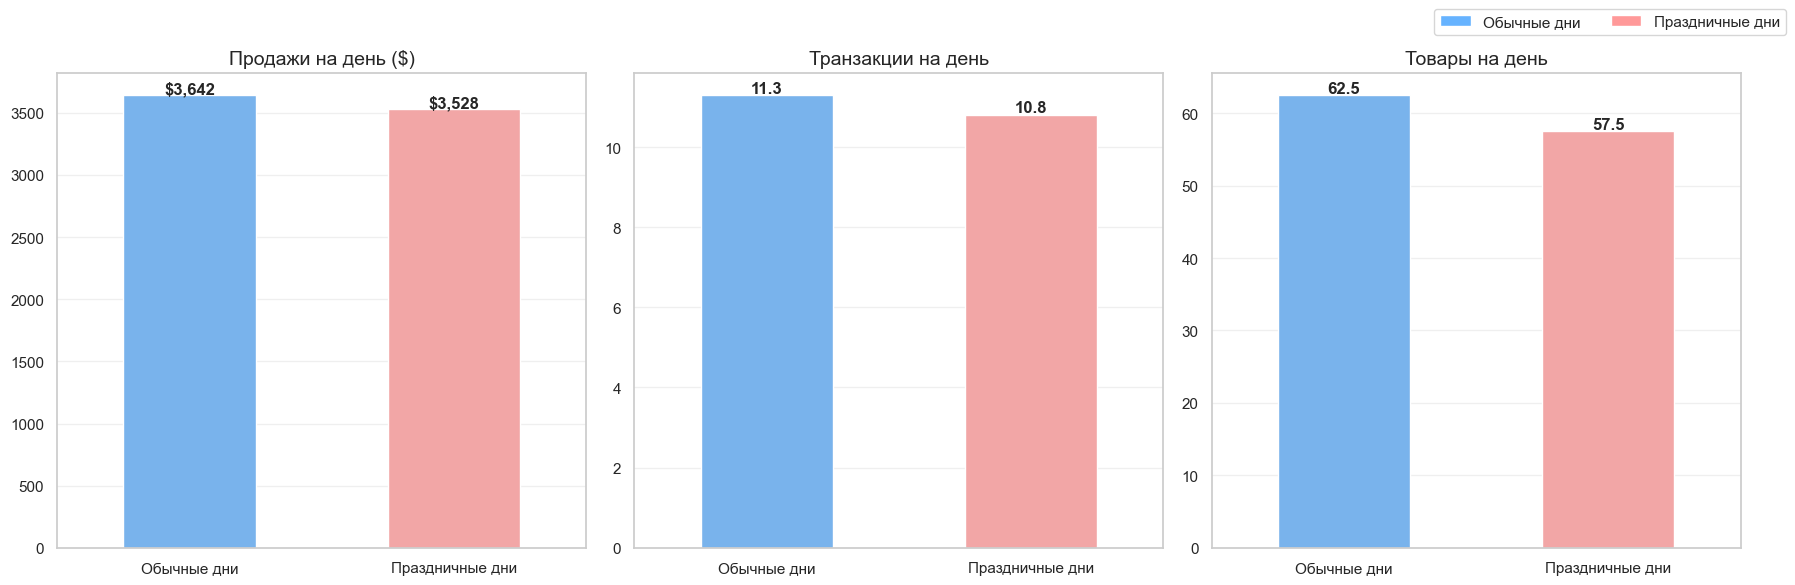

In [87]:
from matplotlib.patches import Patch  # Импортируем Patch для создания легенды

plt.figure(figsize=(18, 6))

# График 1: Относительные продажи на день
plt.subplot(1, 3, 1)
sales_plot = sns.barplot(x=['Обычные дни', 'Праздничные дни'],
                        y=holiday_stats['sales_per_day'],
                        hue=['Обычные дни', 'Праздничные дни'],
                        palette=['#66b3ff','#ff9999'],
                        width=0.5,
                        legend=False)
plt.title('Продажи на день ($)', fontsize=14)
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', alpha=0.3)

for p in sales_plot.patches:
    sales_plot.annotate(f"${p.get_height():,.0f}", 
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontweight='bold')

# График 2: Относительные транзакции на день
plt.subplot(1, 3, 2)
trans_plot = sns.barplot(x=['Обычные дни', 'Праздничные дни'],
                         y=holiday_stats['transactions_per_day'],
                         hue=['Обычные дни', 'Праздничные дни'],
                         palette=['#66b3ff','#ff9999'],
                         width=0.5,
                         legend=False)
plt.title('Транзакции на день', fontsize=14)
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', alpha=0.3)

for p in trans_plot.patches:
    trans_plot.annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontweight='bold')

# График 3: Относительные товары на день
plt.subplot(1, 3, 3)
items_plot = sns.barplot(x=['Обычные дни', 'Праздничные дни'],
                         y=holiday_stats['items_per_day'],
                         hue=['Обычные дни', 'Праздничные дни'],
                         palette=['#66b3ff','#ff9999'],
                         width=0.5,
                         legend=False)
plt.title('Товары на день', fontsize=14)
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', alpha=0.3)

for p in items_plot.patches:
    items_plot.annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontweight='bold')

# Создаем общую легенду
legend_elements = [Patch(facecolor='#66b3ff', label='Обычные дни'),
                   Patch(facecolor='#ff9999', label='Праздничные дни')]

plt.legend(handles=legend_elements, 
           loc='upper right',
           bbox_to_anchor=(1.1, 1.15),
           ncol=2)

plt.tight_layout()
plt.show()

# 7. Корреляционный анализ

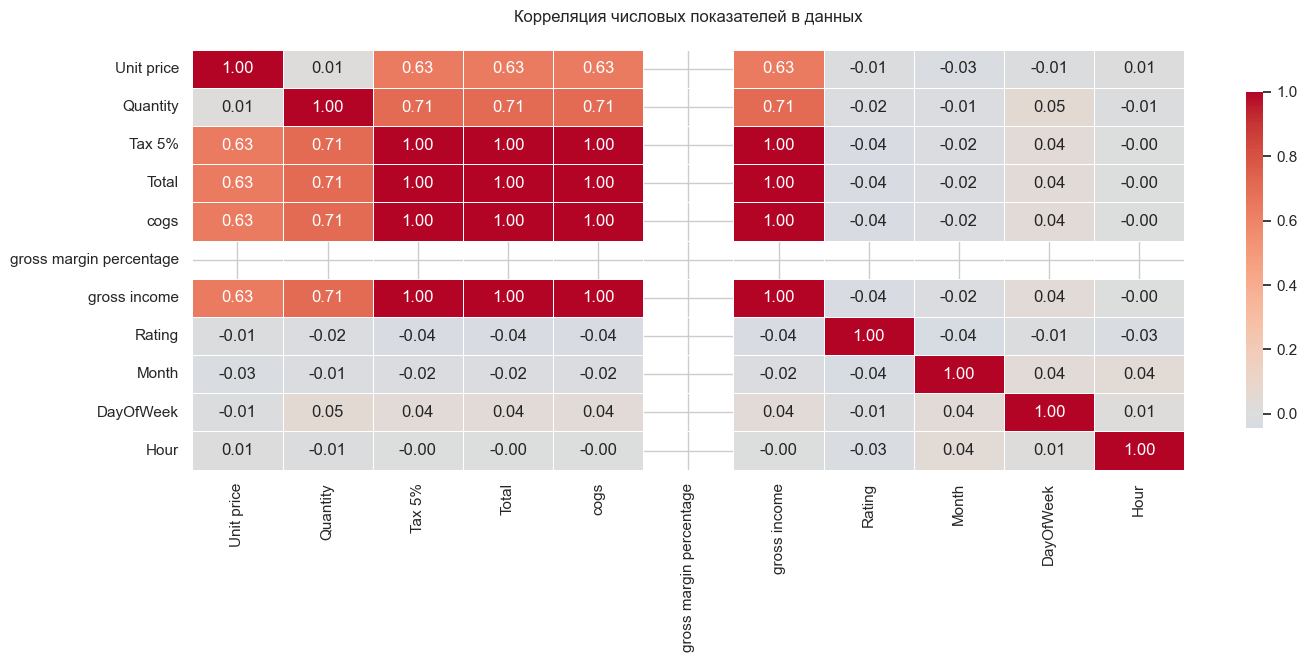

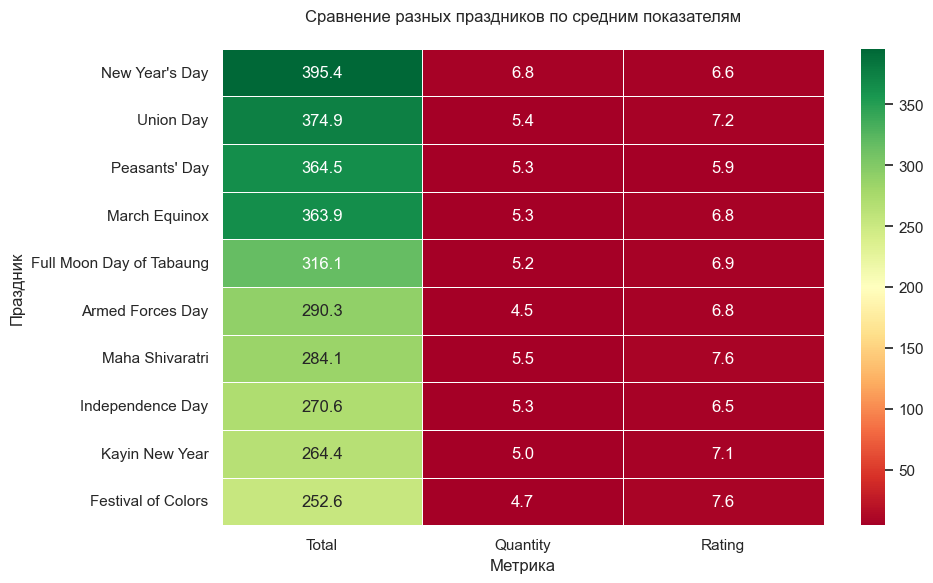

In [90]:
# 1. Heatmap для основного DataFrame
plt.figure(figsize=(16, 12))

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr_matrix = df[numeric_cols].corr()

# Первая heatmap
plt.subplot(2, 1, 1)
sns.heatmap(corr_matrix, 
           annot=True, 
           fmt=".2f", 
           cmap="coolwarm",
           center=0,
           linewidths=.5,
           cbar_kws={"shrink": .8})
plt.title('Корреляция числовых показателей в данных', pad=20)

# 2. Дополнительная heatmap для сравнения праздников
if 'holiday_name' in df.columns:
    holiday_comparison = df[df['is_holiday']].groupby('holiday_name').agg({
        'Total': 'mean',
        'Quantity': 'mean',
        'Rating': 'mean'
    }).sort_values('Total', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(holiday_comparison, 
               annot=True, 
               fmt=".1f", 
               cmap="RdYlGn",
               linewidths=.5)
    plt.title('Сравнение разных праздников по средним показателям', pad=20)
    plt.xlabel('Метрика')
    plt.ylabel('Праздник')
    plt.tight_layout()
    plt.show()